# early prediction of diabetes

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn import metrics

In [ ]:
data=pd.read_csv("C:/Users/cse/Downloads/diabetes.csv")

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data_copy = data.copy(deep = True)

In [ ]:
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] =data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)

In [ ]:
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)

In [ ]:
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(),inplace=True)

In [ ]:
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)

In [ ]:
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

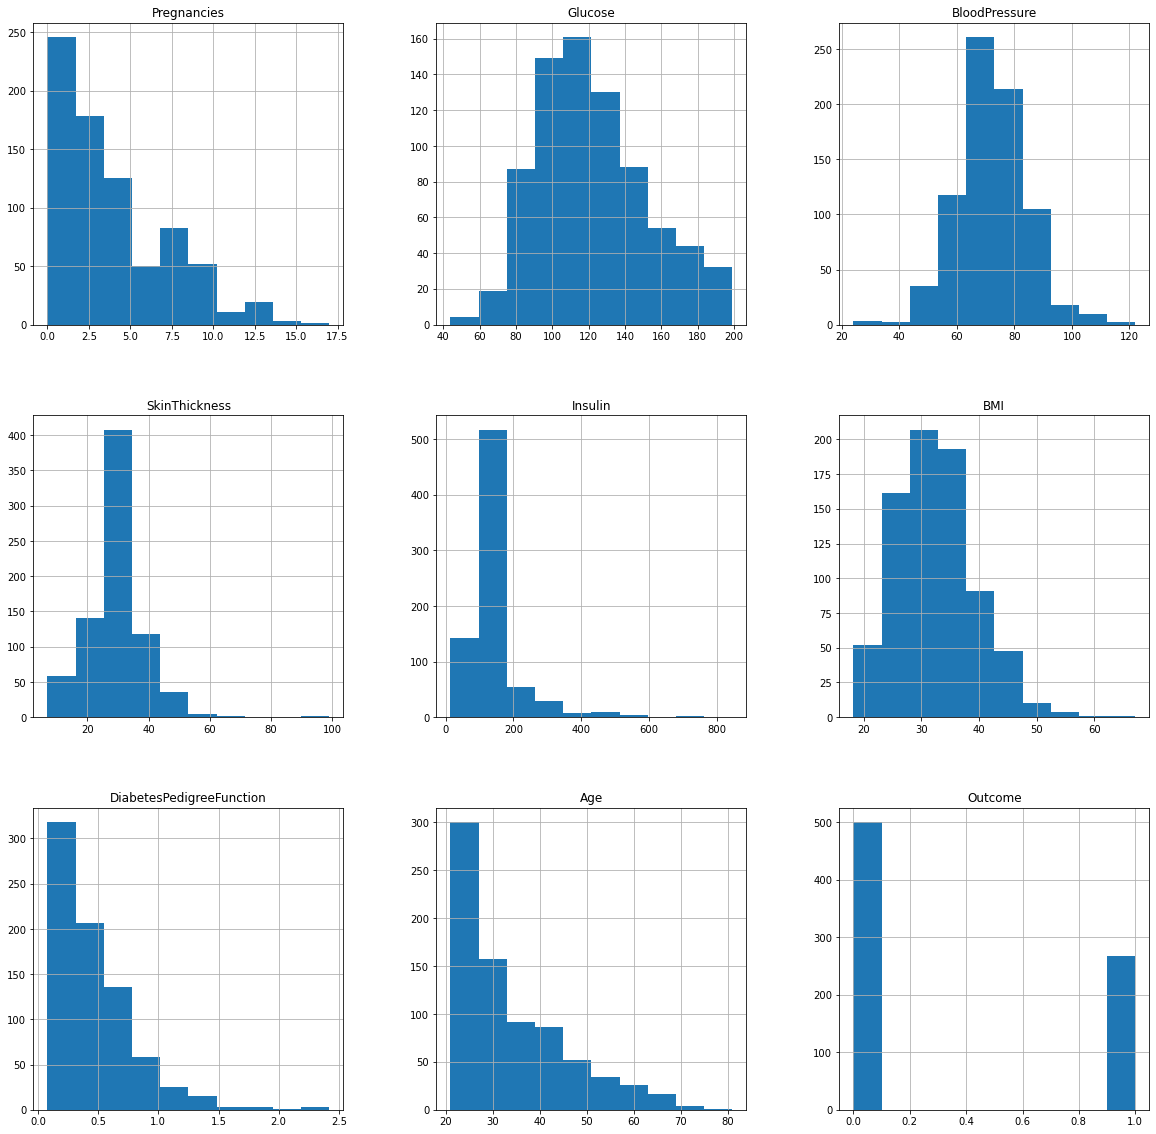

In [ ]:
data_copy.hist(figsize=(20,20))

In [ ]:
print(data.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


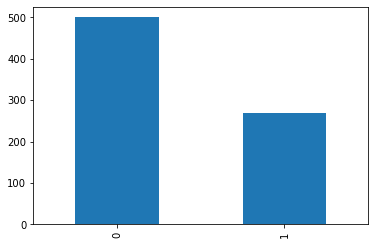

In [ ]:
p=data.Outcome.value_counts().plot(kind="bar")

In [ ]:
df=data_copy.head(30)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,29.0,125.0,32.3,0.232,54,1


In [ ]:
print(df.Outcome.value_counts())

1    18
0    12
Name: Outcome, dtype: int64


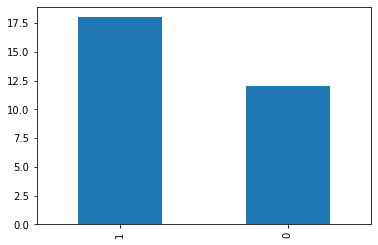

In [ ]:
p=df.Outcome.value_counts().plot(kind="bar")

In [ ]:
X = df.drop('Outcome', axis=1)

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53
9,8,125.0,96.000000,29.0,125.0,32.3,0.232,54


In [ ]:
y=df['Outcome']

In [ ]:
y

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     1
10    0
11    1
12    0
13    1
14    1
15    1
16    1
17    1
18    0
19    1
20    0
21    0
22    1
23    1
24    1
25    1
26    1
27    0
28    0
29    0
Name: Outcome, dtype: int64

C:\Users\cse\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:xlabel='Insulin', ylabel='Density'>,
 <AxesSubplot:xlabel='Insulin', ylabel='Density'>)

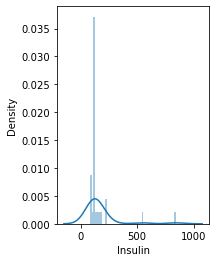

In [ ]:
plt.subplot(121), sns.distplot(df['Insulin'])

(<AxesSubplot:>, <AxesSubplot:>)

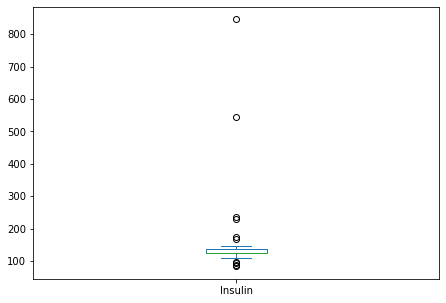

In [ ]:
plt.subplot(122), df['Insulin'].plot.box(figsize=(16,5))


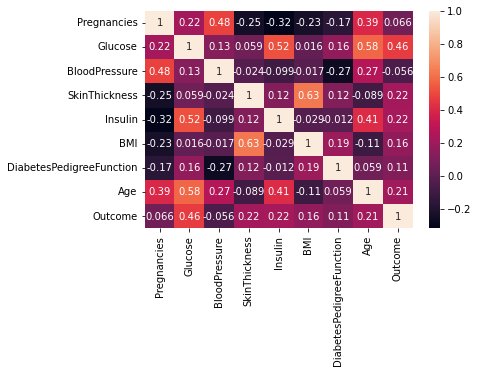

In [ ]:
p=sns.heatmap(df.corr(),annot=True)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=15)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

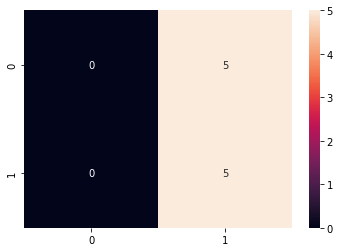

In [ ]:
sns.heatmap(cm,annot=True)

# Random Forest
# Building the model using RandomForest



In [ ]:
X = data.drop('Outcome', axis=1)

In [ ]:
y = data['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=7)

In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90,62,12,43,27.2,0.580,24
236,7,181,84,21,192,35.9,0.586,51
323,13,152,90,33,29,26.8,0.731,43
98,6,93,50,30,64,28.7,0.356,23
701,6,125,78,31,0,27.6,0.565,49
...,...,...,...,...,...,...,...,...
146,9,57,80,37,0,32.8,0.096,41
50,1,103,80,11,82,19.4,0.491,22
699,4,118,70,0,0,44.5,0.904,26
155,7,152,88,44,0,50.0,0.337,36


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
from sklearn import metrics

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7834645669291339


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, predictions))

[[137  25]
 [ 30  62]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       162
           1       0.71      0.67      0.69        92

    accuracy                           0.78       254
   macro avg       0.77      0.76      0.76       254
weighted avg       0.78      0.78      0.78       254



In [ ]:
rfc.predict([[0,137,40,35,168,43.1,2.228,33]])

C:\Users\cse\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
X = df.drop('Outcome', axis=1)
y =df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=7)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [ ]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.4


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[1 4]
 [2 3]]
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.43      0.60      0.50         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10

